In [1]:
import pandas as pd
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
csv_data = "longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity\n-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY\n-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY\n-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY\n-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY\n-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY\n-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY\n-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY\n-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.12,241400.0,NEAR BAY\n-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY\n-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY\n-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY\n-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY\n-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.075,213500.0,NEAR BAY\n-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY\n-122.26,37.85,52.0,2643.0,626.0,1212.0,620.0,1.9167,159200.0,NEAR BAY\n-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.125,140000.0,NEAR BAY\n-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.775,152500.0,NEAR BAY\n-122.27,37.85,52.0,1228.0,293.0,648.0,303.0,2.1202,155500.0,NEAR BAY\n-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY\n-122.27,37.84,52.0,1503.0,298.0,690.0,275.0,2.6033,162900.0,NEAR BAY\n-122.27,37.85,40.0,751.0,184.0,409.0,166.0,1.3578,147500.0,NEAR BAY\n-122.27,37.85,42.0,1639.0,367.0,929.0,366.0,1.7135,159800.0,NEAR BAY\n-122.27,37.84,52.0,2436.0,541.0,1015.0,478.0,1.725,113900.0,NEAR BAY\n-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY\n-122.27,37.84,52.0,2224.0,437.0,1006.0,422.0,2.6,132600.0,NEAR BAY\n-122.28,37.85,41.0,535.0,123.0,317.0,119.0,2.4038,107500.0,NEAR BAY\n-122.28,37.85,49.0,1130.0,244.0,607.0,239.0,2.4597,93800.0,NEAR BAY\n-122.28,37.85,52.0,1898.0,421.0,1102.0,397.0,1.808,105500.0,NEAR BAY\n-122.28,37.84,50.0,2082.0,492.0,1131.0,473.0,1.6424,108900.0,NEAR BAY\n-122.28,37.84,52.0,729.0,160.0,395.0,155.0,1.6875,132000.0,NEAR BAY\n-122.28,37.84,49.0,1916.0,447.0,863.0,378.0,1.9274,122300.0,NEAR BAY\n-122.28,37.84,52.0,2153.0,481.0,1168.0,441.0,1.9615,115200.0,NEAR BAY\n-122.27,37.84,48.0,1922.0,409.0,1026.0,335.0,1.7969,110400.0,NEAR BAY\n-122.27,37.83,49.0,1655.0,366.0,754.0,329.0,1.375,104900.0,NEAR BAY\n-122.27,37.83,51.0,2665.0,574.0,1258.0,536.0,2.7303,109700.0,NEAR BAY\n-122.27,37.83,49.0,1215.0,282.0,570.0,264.0,1.4861,97200.0,NEAR BAY\n-122.27,37.83,48.0,1798.0,432.0,987.0,374.0,1.0972,104500.0,NEAR BAY\n-122.28,37.83,52.0,1511.0,390.0,901.0,403.0,1.4103,103900.0,NEAR BAY\n-122.26,37.83,52.0,1470.0,330.0,689.0,309.0,3.48,191400.0,NEAR BAY\n-122.26,37.83,52.0,2432.0,715.0,1377.0,696.0,2.5898,176000.0,NEAR BAY\n-122.26,37.83,52.0,1665.0,419.0,946.0,395.0,2.0978,155400.0,NEAR BAY\n-122.26,37.83,51.0,936.0,311.0,517.0,249.0,1.2852,150000.0,NEAR BAY\n-121.56,39.16,21.0,1872.0,302.0,870.0,301.0,3.725,84700.0,INLAND\n-121.56,39.16,12.0,3349.0,642.0,2029.0,619.0,2.9647,88800.0,INLAND\n-121.57,39.16,33.0,2033.0,375.0,914.0,330.0,2.6964,68500.0,INLAND\n-121.58,39.16,33.0,1897.0,378.0,888.0,385.0,2.1111,68700.0,INLAND\n-121.58,39.15,38.0,1756.0,396.0,837.0,401.0,1.9122,55500.0,INLAND\n-121.56,39.16,35.0,2157.0,441.0,1009.0,409.0,1.5827,63000.0,INLAND\n-121.57,39.16,18.0,1632.0,367.0,769.0,330.0,3.1029,71700.0,INLAND\n-121.57,39.13,30.0,442.0,103.0,413.0,88.0,1.5694,57900.0,INLAND\n-121.56,39.13,17.0,2277.0,608.0,1607.0,562.0,1.5085,69700.0,INLAND\n-121.54,39.13,18.0,4289.0,1021.0,2707.0,939.0,1.3375,59600.0,INLAND\n-121.54,39.12,17.0,4251.0,899.0,3265.0,934.0,2.3496,65000.0,INLAND\n-121.58,39.12,26.0,2796.0,629.0,2017.0,632.0,1.8355,61200.0,INLAND\n-121.57,39.12,30.0,2601.0,534.0,1702.0,506.0,2.08,56600.0,INLAND\n-121.57,39.1,28.0,1442.0,333.0,832.0,286.0,1.8413,62300.0,INLAND\n-121.59,39.1,24.0,1107.0,261.0,768.0,205.0,1.7167,48800.0,INLAND\n-121.56,39.11,18.0,2171.0,480.0,1527.0,447.0,2.3011,57500.0,INLAND\n-121.56,39.1,28.0,2130.0,484.0,1195.0,439.0,1.3631,45500.0,INLAND\n-121.55,39.1,27.0,1783.0,441.0,1163.0,409.0,1.2857,47000.0,INLAND\n-121.56,39.08,26.0,1377.0,289.0,761.0,267.0,1.4934,48300.0,INLAND\n-121.55,39.09,31.0,1728.0,365.0,1167.0,384.0,1.4958,53400.0,INLAND\n-121.54,39.08,26.0,2276.0,460.0,1455.0,474.0,2.4695,58000.0,INLAND\n-121.54,39.08,23.0,1076.0,216.0,724.0,197.0,2.3598,57500.0,INLAND\n-121.53,39.08,15.0,1810.0,441.0,1157.0,375.0,2.0469,55100.0,INLAND\n-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0,INLAND\n-121.55,39.06,25.0,1332.0,247.0,726.0,226.0,2.25,63400.0,INLAND\n-121.56,39.01,22.0,1891.0,340.0,1023.0,296.0,2.7303,99100.0,INLAND\n-121.48,39.05,40.0,198.0,41.0,151.0,48.0,4.5625,100000.0,INLAND\n-121.47,39.01,37.0,1244.0,247.0,484.0,157.0,2.3661,77500.0,INLAND\n-121.44,39.0,20.0,755.0,147.0,457.0,157.0,2.4167,67000.0,INLAND\n-121.37,39.03,32.0,1158.0,244.0,598.0,227.0,2.8235,65500.0,INLAND\n-121.41,39.04,16.0,1698.0,300.0,731.0,291.0,3.0739,87200.0,INLAND\n-121.52,39.12,37.0,102.0,17.0,29.0,14.0,4.125,72000.0,INLAND\n-121.43,39.18,36.0,1124.0,184.0,504.0,171.0,2.1667,93800.0,INLAND\n-121.32,39.13,5.0,358.0,65.0,169.0,59.0,3.0,162500.0,INLAND\n-121.48,39.1,19.0,2043.0,421.0,1018.0,390.0,2.5952,92400.0,INLAND\n-121.39,39.12,28.0,10035.0,1856.0,6912.0,1818.0,2.0943,108300.0,INLAND\n-121.32,39.29,11.0,2640.0,505.0,1257.0,445.0,3.5673,112000.0,INLAND\n-121.4,39.33,15.0,2655.0,493.0,1200.0,432.0,3.5179,107200.0,INLAND\n-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.125,115600.0,INLAND\n-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0,INLAND\n-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND\n-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND\n-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND\n-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7,92300.0,INLAND\n-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND\n-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND"
df = pd.read_csv(StringIO(csv_data))

print('Data Info:')
print(df.info())
print('\nMissing Values:')
print(df.isna().sum())
print('\nDuplicates:', df.duplicated().sum())
print('\nSummary Statistics:')
print(df.describe())
print('\nOcean Proximity Values:', df['ocean_proximity'].value_counts())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           88 non-null     float64
 1   latitude            88 non-null     float64
 2   housing_median_age  88 non-null     float64
 3   total_rooms         88 non-null     float64
 4   total_bedrooms      88 non-null     float64
 5   population          88 non-null     float64
 6   households          88 non-null     float64
 7   median_income       88 non-null     float64
 8   median_house_value  88 non-null     float64
 9   ocean_proximity     88 non-null     object 
dtypes: float64(9), object(1)
memory usage: 7.0+ KB
None

Missing Values:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_pr

In [3]:
df = df.drop_duplicates()
print('Duplicates after removal:', df.duplicated().sum())

Duplicates after removal: 0


In [4]:
numeric_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
for col in numeric_cols:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)

print('Missing Values after Imputation:')
print(df.isna().sum())

Missing Values after Imputation:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


/tmp/ipython-input-1611318081.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


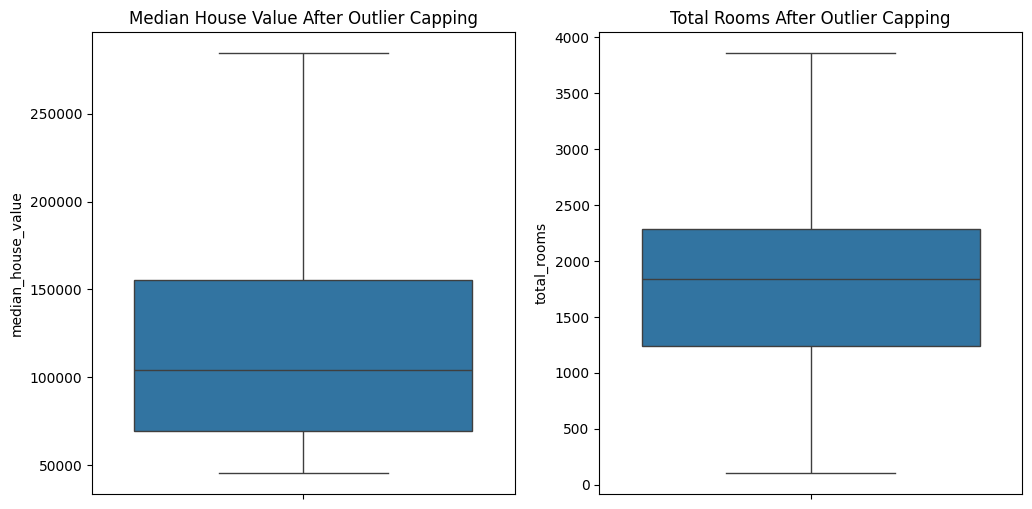

In [5]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

for col in ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']:
    if col in df.columns:
        cap_outliers(df, col)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['median_house_value'])
plt.title('Median House Value After Outlier Capping')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['total_rooms'])
plt.title('Total Rooms After Outlier Capping')
plt.show()

In [6]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

if 'ocean_proximity' in df.columns:
    df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

print('Features after Preprocessing:')
print(X.head())

Features after Preprocessing:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -0.938627 -0.981663            0.342622    -1.146442       -1.447186   
1  -0.913597 -1.011868           -1.040438     2.372121        2.222061   
2  -0.963657 -1.026970            1.103305    -0.453066       -1.112496   
3  -0.988687 -1.026970            1.103305    -0.681041       -0.865593   
4  -0.988687 -1.026970            1.103305    -0.264070       -0.618691   

   population  households  median_income  rooms_per_household  \
0   -1.399361   -1.372740       2.660527             2.122514   
1    2.295421    2.163573       2.660527             0.003499   
2   -1.005281   -1.080909       2.660527             3.659652   
3   -0.864861   -0.840577       2.660527             0.747143   
4   -0.849008   -0.611689       1.444960             1.294688   

   bedrooms_per_room  population_per_household  ocean_proximity_NEAR BAY  
0          -2.184819                 -0.159099       

Linear Regression:
MSE: 1529774236.108013
R²: 0.7312028524496268

Random Forest Regressor:
MSE: 513583762.6857639
R²: 0.9097580236484164


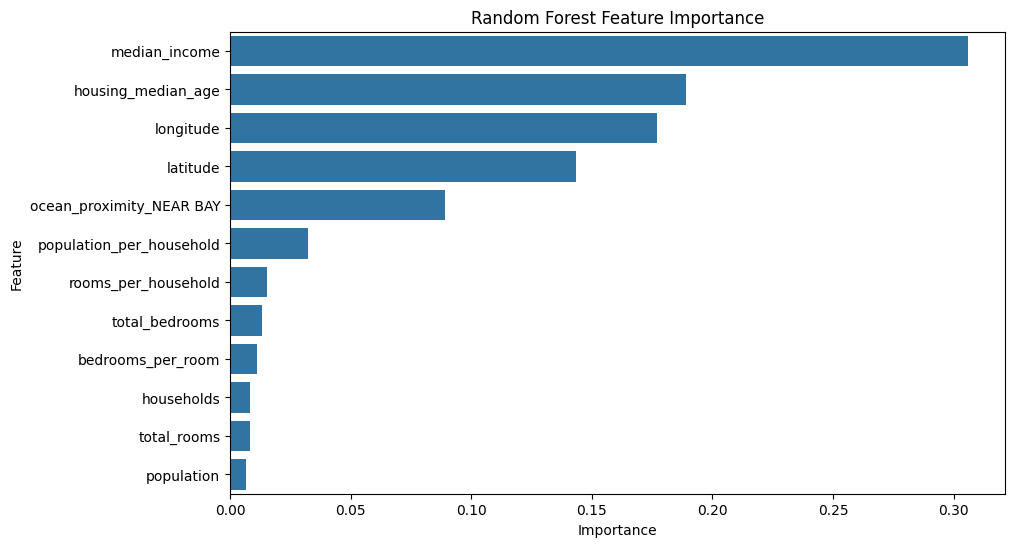

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('Linear Regression:')
print('MSE:', mean_squared_error(y_test, y_pred_lr))
print('R²:', r2_score(y_test, y_pred_lr))

print('\nRandom Forest Regressor:')
print('MSE:', mean_squared_error(y_test, y_pred_rf))
print('R²:', r2_score(y_test, y_pred_rf))

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Random Forest Feature Importance')
plt.show()

In [8]:
df.to_csv('housing_cleaned.csv', index=False)
predictions = pd.DataFrame({'Actual': y_test, 'Linear_Regression_Pred': y_pred_lr, 'Random_Forest_Pred': y_pred_rf})
predictions.to_csv('housing_predictions.csv', index=False)
print('Cleaned data saved to housing_cleaned.csv')
print('Predictions saved to housing_predictions.csv')

Cleaned data saved to housing_cleaned.csv
Predictions saved to housing_predictions.csv
